
## Bike Sharing - Case Studies

### Summary :
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic, aiming to make profits post pandemic in recovering economy and satisfy customer needs.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

###  Business Goal:
<font color = Red>You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.</font>

In [1]:
# import/ Library block
# importing pandas, Numpy, Matplotlib & Seaborn ...
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

# importing train_test splitting library function ...
from sklearn.model_selection import train_test_split
#Scaler in Sklearn Library ...
from sklearn.preprocessing import MinMaxScaler
# importing r2_score, mean-squared method to check accuracy of model ...
from sklearn.metrics import r2_score, mean_squared_error

# Importing RFE and LinearRegression (regression specific)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#importing statsmodel libraries
import statsmodels.api as sm  
# Library in statsmodel to calculte VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ignore warnings ...
import warnings
warnings.filterwarnings('ignore')

### 1. Data Check - & - Cleansing...

In [2]:
day = pd.read_csv("day.csv")
day.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month', 'weathersit':'weather',
                      'hum':'humidity', 'cnt':'Ridecount'}, inplace = True)
day.shape

(730, 16)

In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weather     730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  Ridecount   730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
day.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Ridecount
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
day = day.drop(['instant'], axis=1)
day.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Ridecount
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Designing a Ploting function to plot Bar plot for respective attributes - v/s - Ridecount

In [6]:
# graph function to plot bar graphs 

def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

### 2 .  Variable analysis : 

#### 2.1 . Date Analysis

The Date column has no null records of object datatype which is a problem ideally should be 'int' thus will convert the type to int and groupby the dataset by date column to correspond to respective mean value of Ridecount divide by 1000 as on an average   

In [7]:
# Type checking of Date column
day['date'].describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: date, dtype: object

In [8]:
# bought the date column to proper format for correct calculations & avoid mistakes
day['date'] = day['date'].apply(lambda x: int(x.split('-')[0]))

print(day['date'].describe())

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: date, dtype: float64


In [9]:
day.head(3)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Ridecount
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [10]:
date_Rides = round(day.groupby('date').Ridecount.mean()/1000, 2)

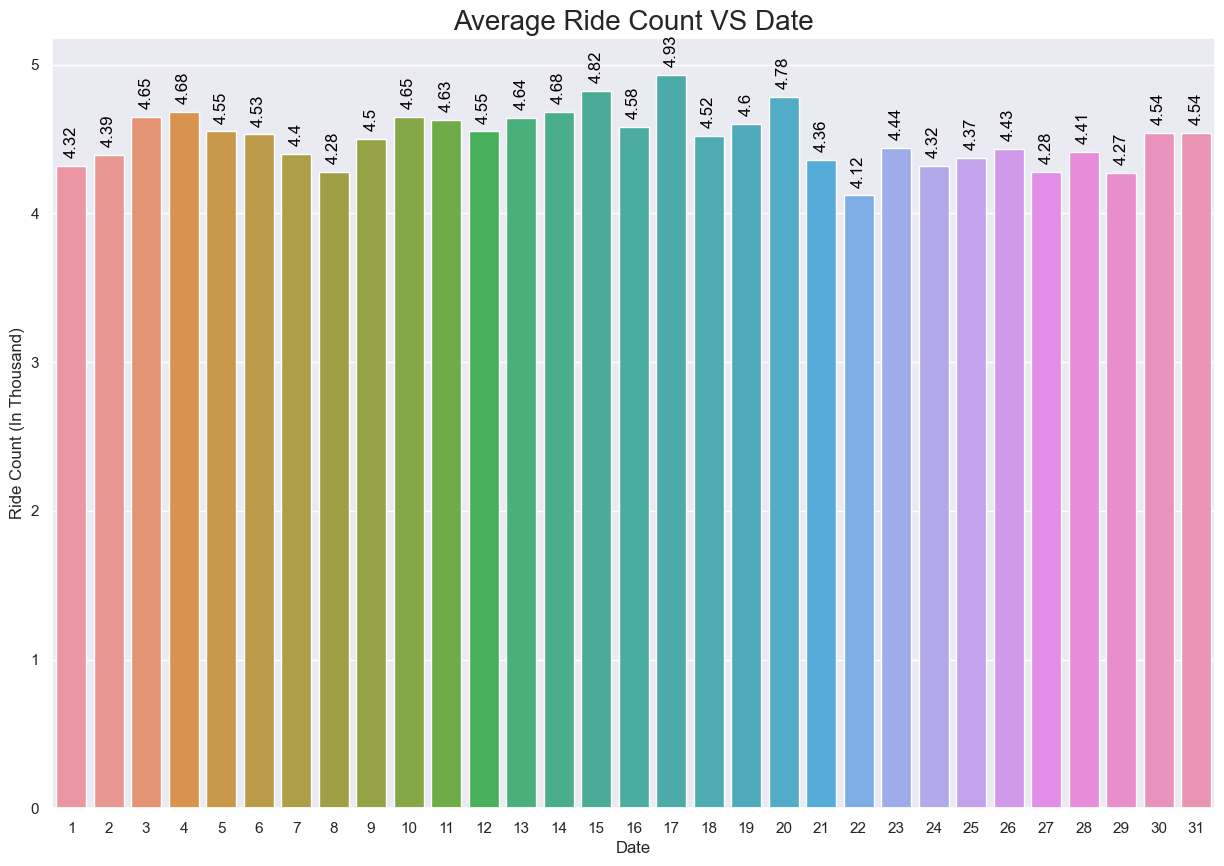

In [11]:
bar_graph_plot_function(data=date_Rides, graph_title='Average Ride Count VS Date', x_axis_label='Date',
                        y_axis_label='Ride Count (In Thousand)', data_label='vertical', x_label_rotation=0)

#### 2.2 . Season Analysis

In [12]:
# As we saw in previous Data cleansing section the Season col is is proper format so no need to make any changes 
day['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
day['season'] = day['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [14]:
Season_Rides = day.groupby('season').Ridecount.mean().sort_values()
Season_Rides

season
spring    2608.411111
winter    4728.162921
summer    4992.331522
fall      5644.303191
Name: Ridecount, dtype: float64

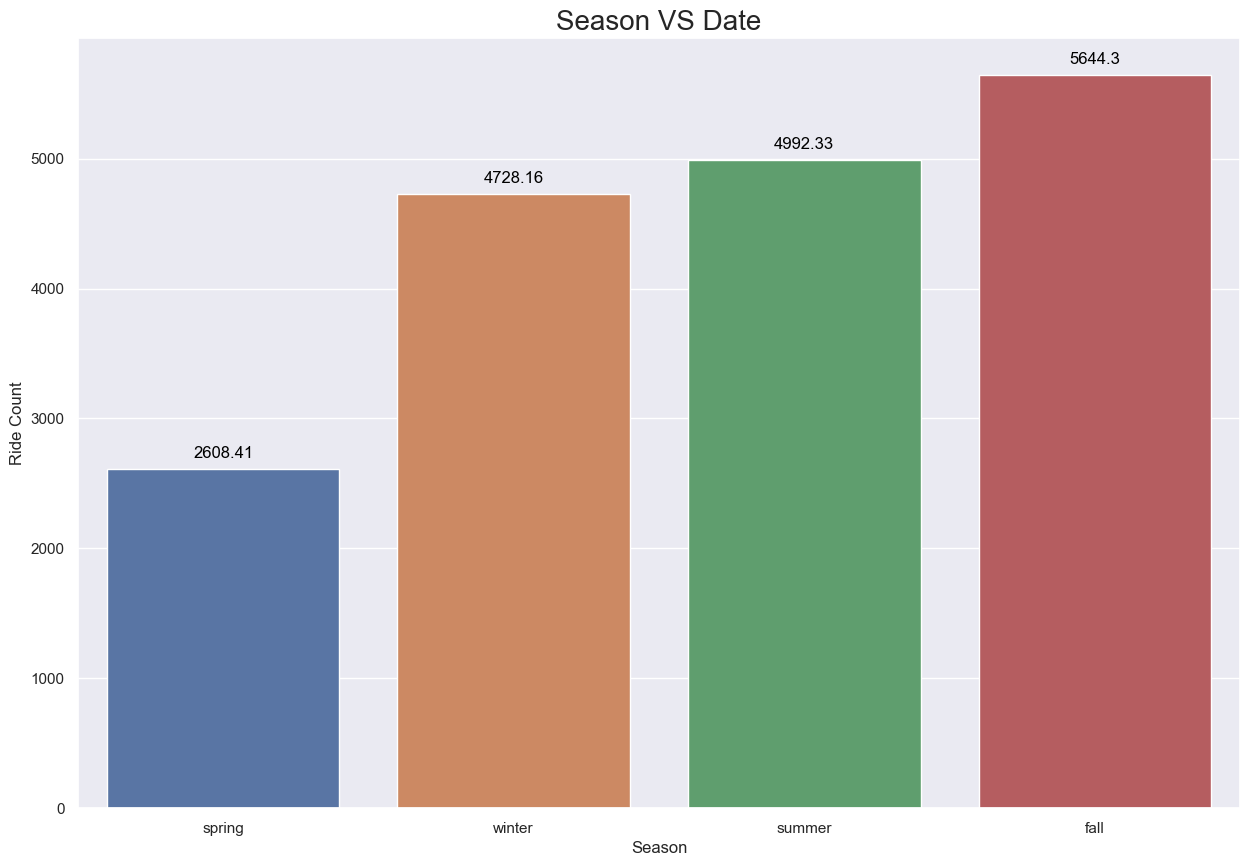

In [15]:
bar_graph_plot_function(data=Season_Rides, graph_title='Season VS Date', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

#### 2.3 . Year Analysis

In [16]:
Year_Rides = day.groupby('year').Ridecount.mean().sort_values()
Year_Rides

year
0    3405.761644
1    5610.252055
Name: Ridecount, dtype: float64

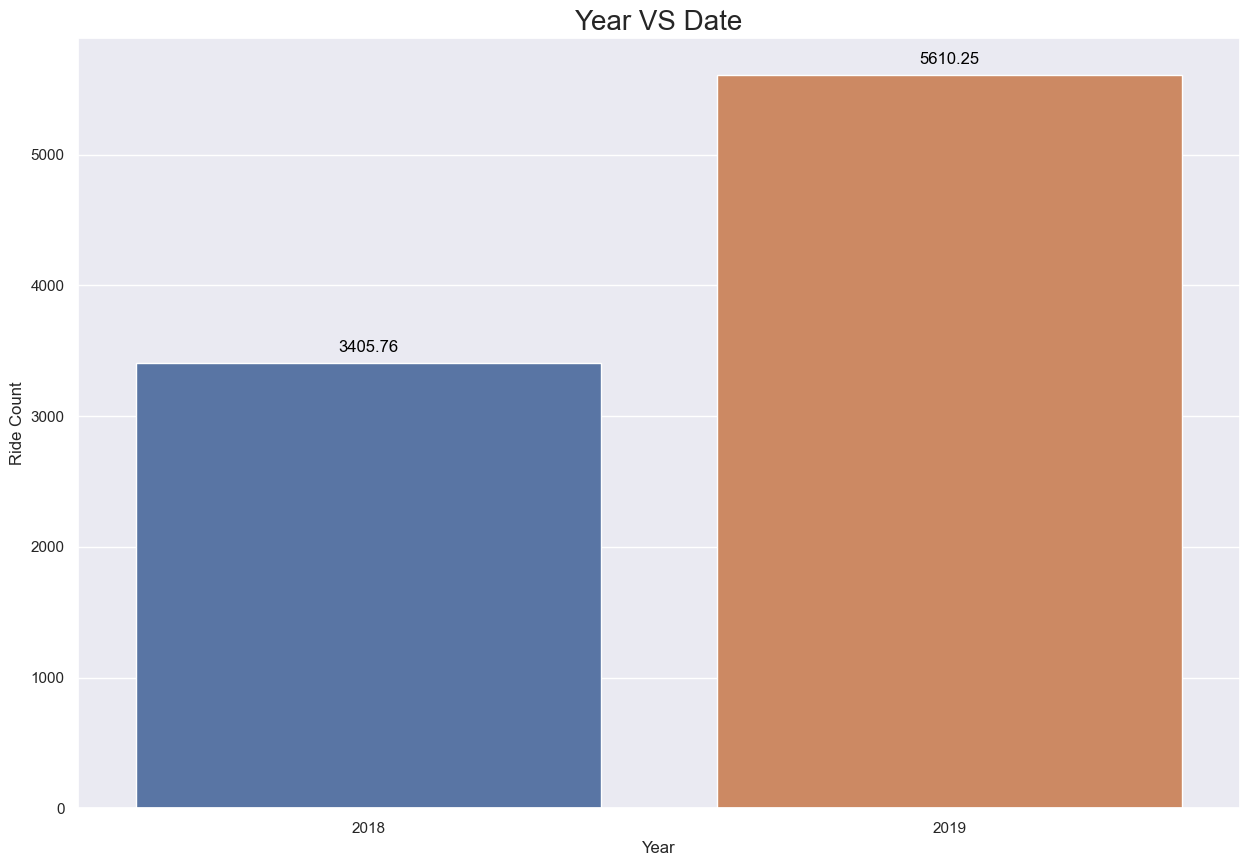

In [17]:
bar_graph_plot_function(data=Year_Rides, graph_title='Year VS Date', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, x_text =['2018', '2019'])

#### 2.4 . Monthly Analysis

In [18]:
Monthly_Rides = day.groupby('month').Ridecount.mean()
Monthly_Rides

month
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: Ridecount, dtype: float64

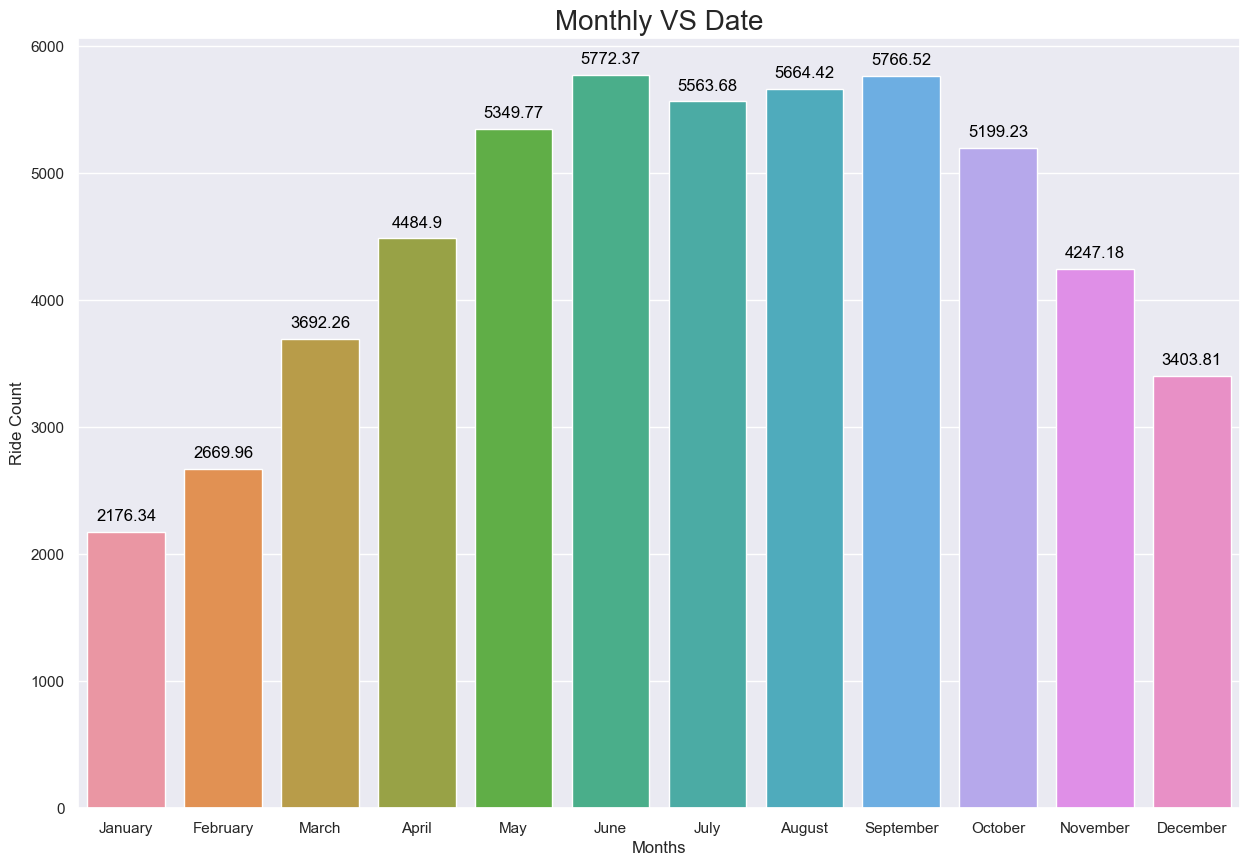

In [19]:
bar_graph_plot_function(data = Monthly_Rides, graph_title='Monthly VS Date', x_axis_label='Months',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text =[datetime.date(2018, i , 1).strftime('%B') for i in range(1, 13)])

In the above plot we can see the rides count drastically increase in month of May to October which is basically summer or the fall season.

#### 2.5 . Holiday Analysis

In [20]:
print(day.holiday.unique())
day.holiday.describe()

[0 1]


count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

In [21]:
holiday_Rides = day.groupby('holiday').Ridecount.mean()
holiday_Rides

holiday
0    4530.90268
1    3735.00000
Name: Ridecount, dtype: float64

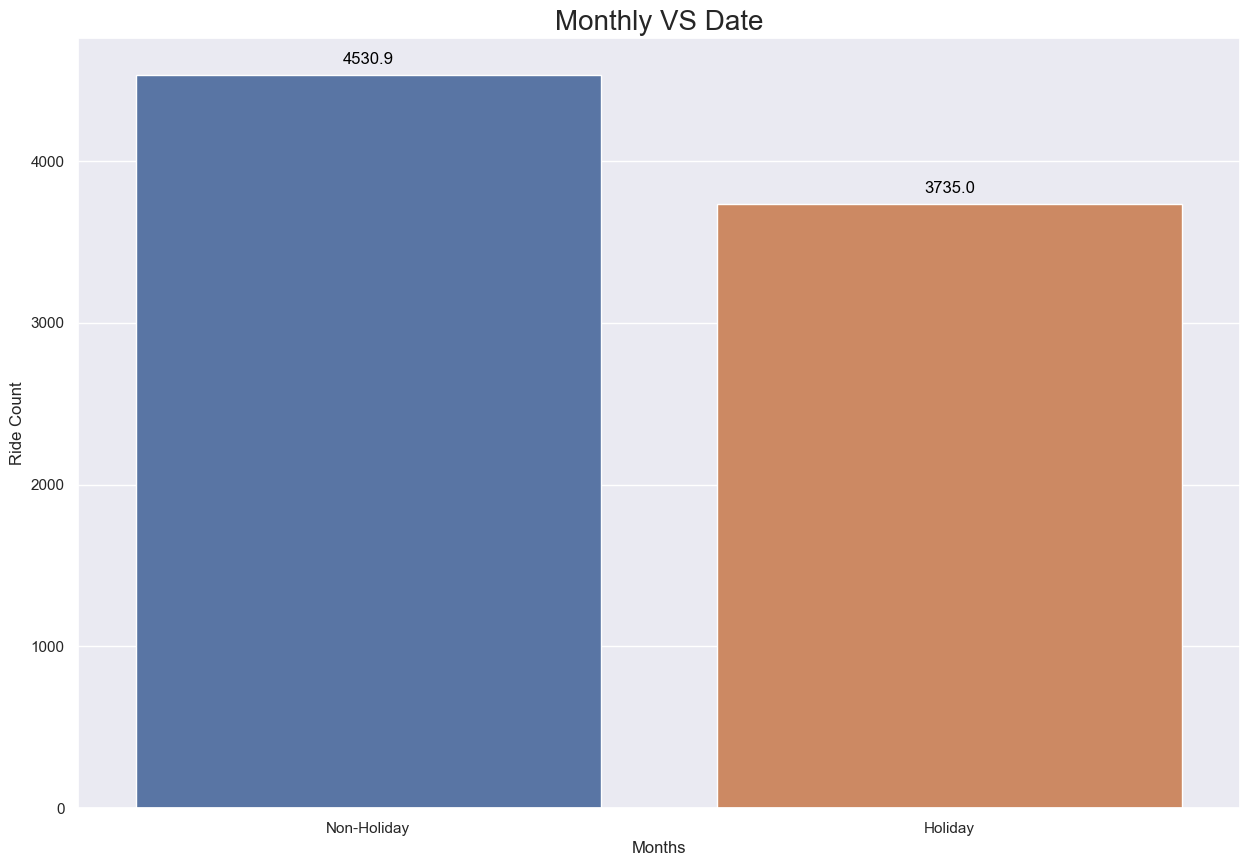

In [22]:
bar_graph_plot_function(data = holiday_Rides, graph_title='Monthly VS Date', x_axis_label='Months',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text= ['Holiday', 'NON-Holiday'])

#### 2.6 . weekday Analysis

- weekday represents days of week from 0 to 6 mapping to Sunday to Saturday respectively.

In [23]:
Weekly_Rides = day.groupby('weekday').Ridecount.mean()
Weekly_Rides

weekday
0    4665.721154
1    4259.819048
2    4274.495238
3    4444.961538
4    4691.567308
5    4597.423077
6    4626.692308
Name: Ridecount, dtype: float64

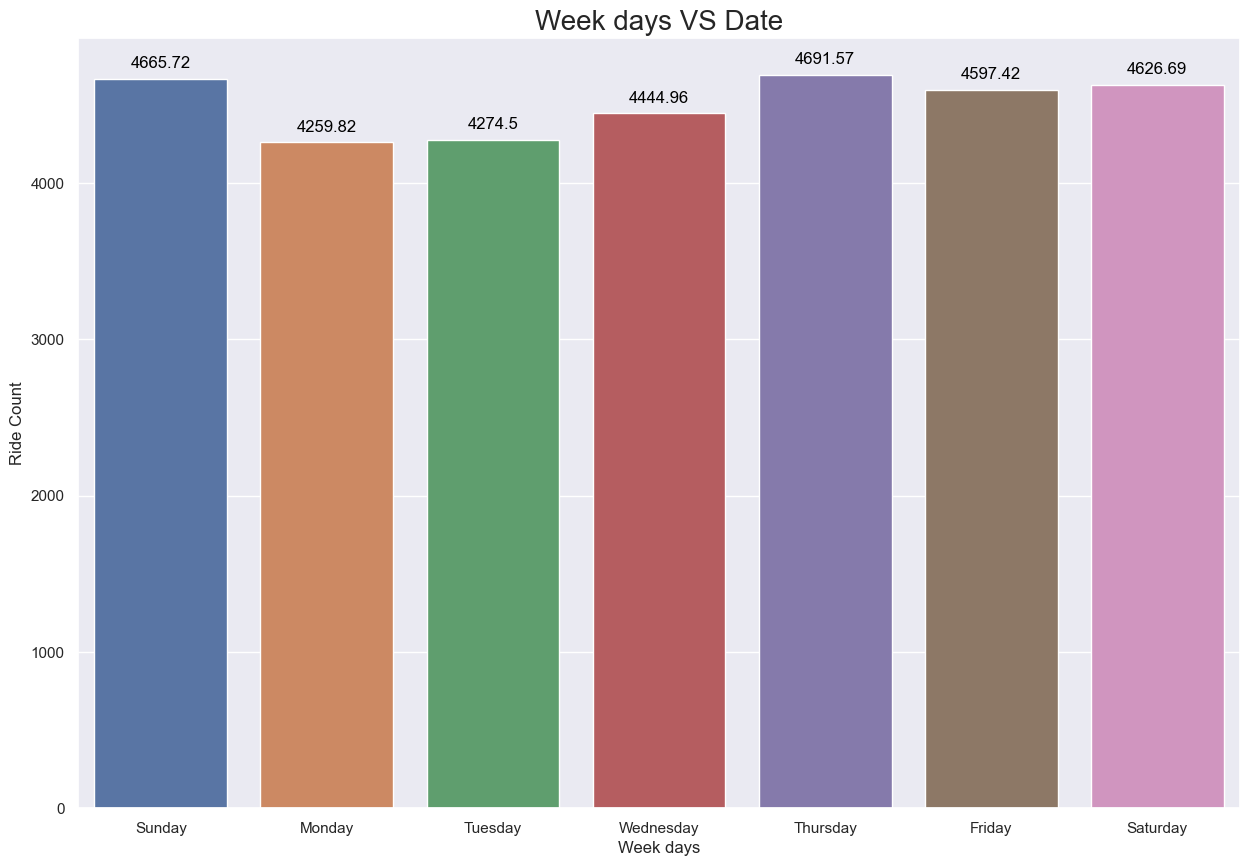

In [24]:
bar_graph_plot_function(data = Weekly_Rides, graph_title='Week days VS Date', x_axis_label='Week days',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [25]:
day.groupby(by='weekday').weekday.count()

weekday
0    104
1    105
2    105
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

**2.7 . Working Day**

In [26]:
day.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [27]:
day.workingday.describe()

count    730.000000
mean       0.690411
std        0.462641
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [28]:
Workingday_Rides = day.groupby('workingday').Ridecount.mean()
Workingday_Rides

workingday
0    4587.862832
1    4472.198413
Name: Ridecount, dtype: float64

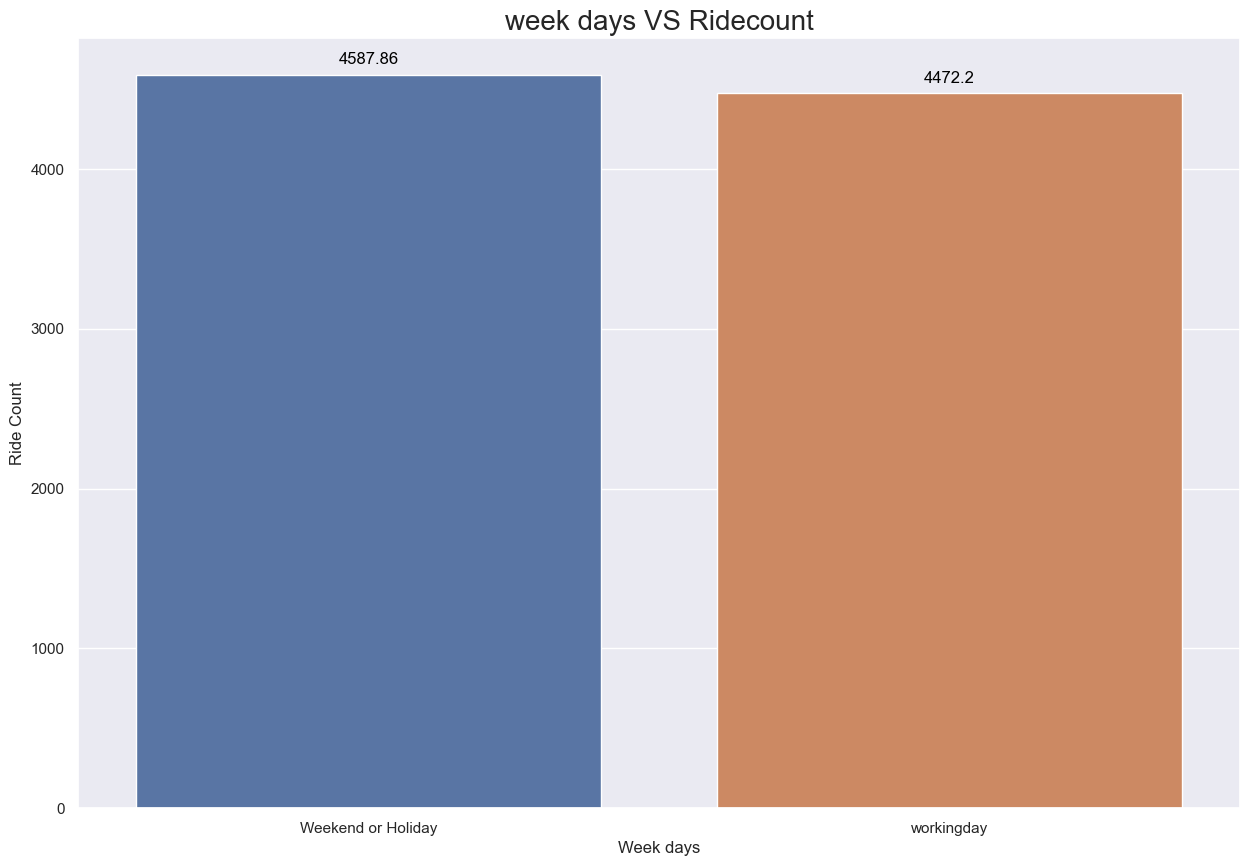

In [29]:
bar_graph_plot_function(data = Workingday_Rides, graph_title='week days VS Ridecount', x_axis_label='Week days',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text= ['Weekend or Holiday', 'workingday'])

**2.8 . Weather Situation**

In [30]:
print(day.weather.value_counts())
day.weather.describe()

1    463
2    246
3     21
Name: weather, dtype: int64


count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weather, dtype: float64

In [31]:
weather_Rides = day.groupby('weather').Ridecount.mean()
weather_Rides

weather
1    4876.786177
2    4044.813008
3    1803.285714
Name: Ridecount, dtype: float64

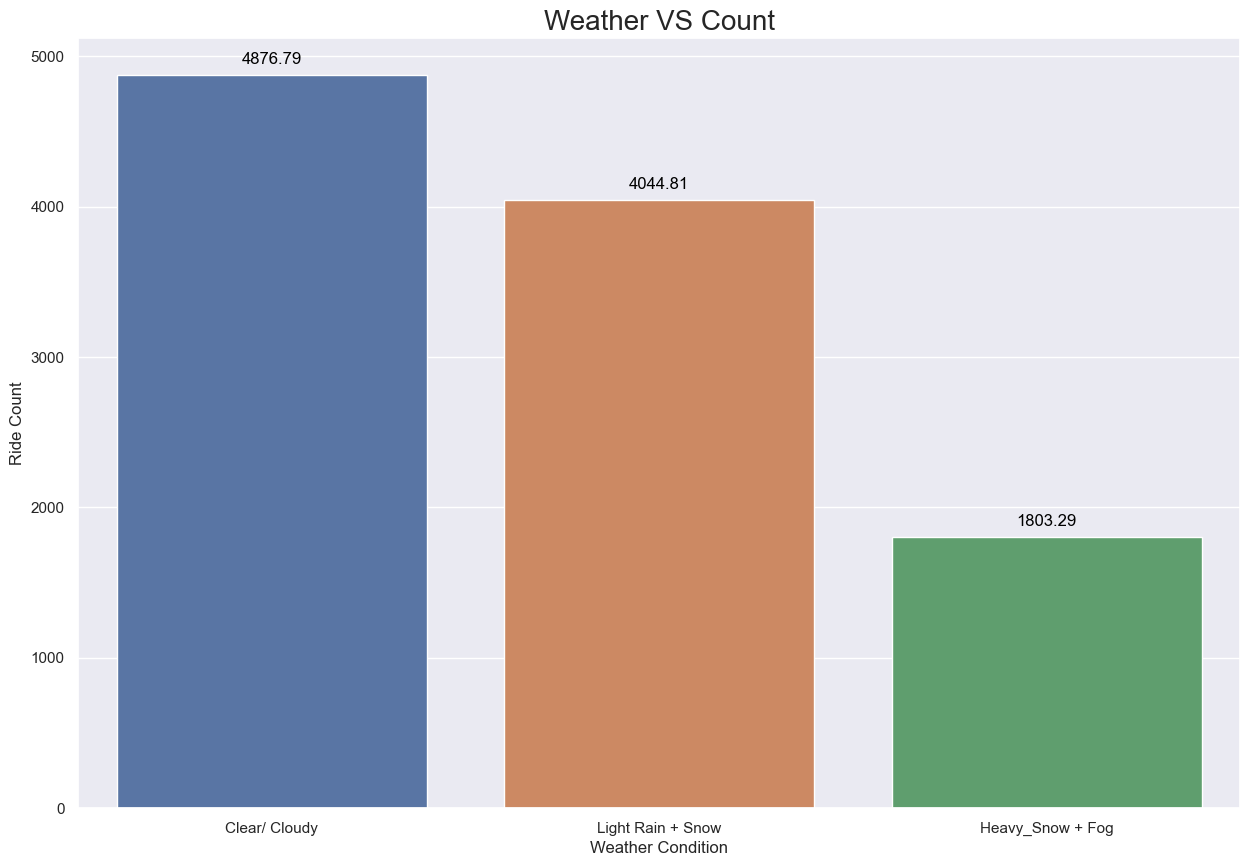

In [32]:
bar_graph_plot_function(data = weather_Rides, graph_title='Weather VS Count', x_axis_label='Weather Condition',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text= ['Clear/ Cloudy', 'Light Rain + Snow', 'Heavy_Snow + Fog'])

**2.9 . Temperature Situation**

In [33]:
day.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Lets see if the temperature variables are correlated in anyway with each other

In [34]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(day['temp'], day["atemp"]), index=headers, columns=headers)  

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


As assumed the previously the 2 variables are correlated highly thus lets drop 'atemp' attribute and move forward only with the 'temp' variable and proceed with analysis and insight generation.

In [35]:
day = day.drop(['atemp'], axis=1)
day.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,Ridecount
0,1,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


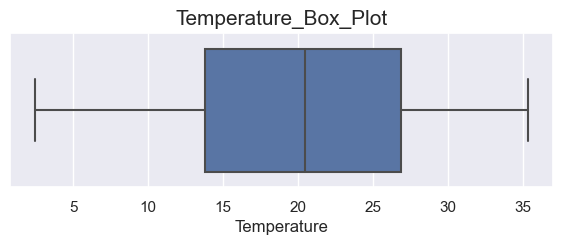

In [36]:
plt.figure(figsize=(7, 2))
sns.boxplot(data = day, x ='temp')
plt.title('Temperature_Box_Plot', fontdict={'fontsize': 15})
plt.xlabel('Temperature', fontdict={'fontsize': 12})
plt.show()

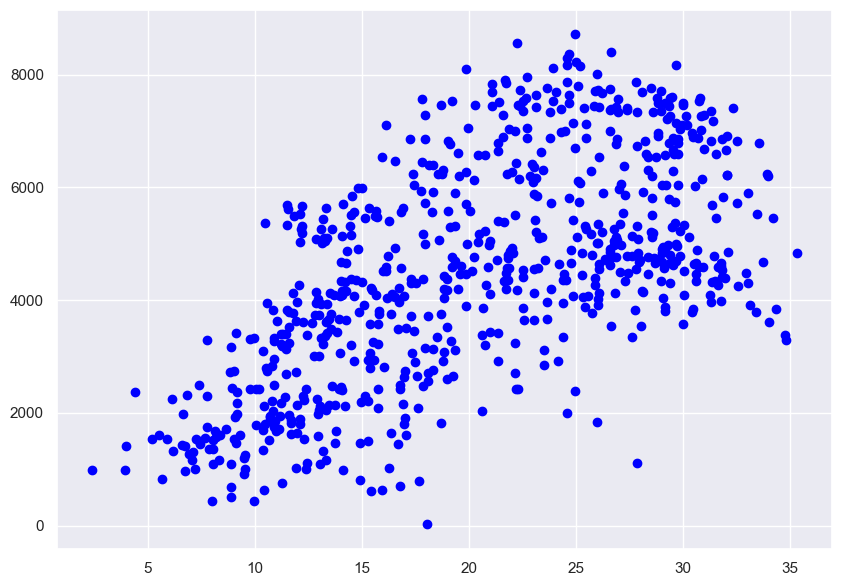

In [37]:
plt.figure(figsize=(10, 7))
x = day.temp
y = day.Ridecount 
plt.scatter(x, y, c ="blue")
# To show the plot
plt.show()

**2.10 . Humidity**

In [38]:
day.humidity.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

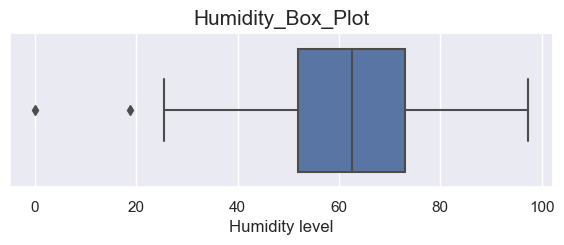

In [39]:
plt.figure(figsize=(7, 2))
sns.boxplot(data = day, x ='humidity')
plt.title('Humidity_Box_Plot', fontdict={'fontsize': 15})
plt.xlabel('Humidity level', fontdict={'fontsize': 12})
plt.show()

In [40]:
day.sort_values('humidity').head(3)

,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,Ridecount
68,10,spring,0,3,0,6,0,3,15.952731,0.0000,17.545759,46,577,623
49,19,spring,0,2,0,1,1,1,16.365847,18.7917,34.000021,532,1103,1635
461,7,summer,1,4,0,0,0,1,17.937500,25.4167,18.416357,3252,3605,6857


To check if this value "0.0" in "humidity" attribute column is an actual value or just a typo i.e. a mistaken value added in the column we will plot a graph of few values before and after present in dataset of the 0.0 humidity record entry, as ideally the humidity can not suddenly have a value 0 on a certain day whereas it should gradually increase or decrease overtime weeks or days.

In [41]:
Hum_check = day[(day.index > 48) & (day.index < 88)]

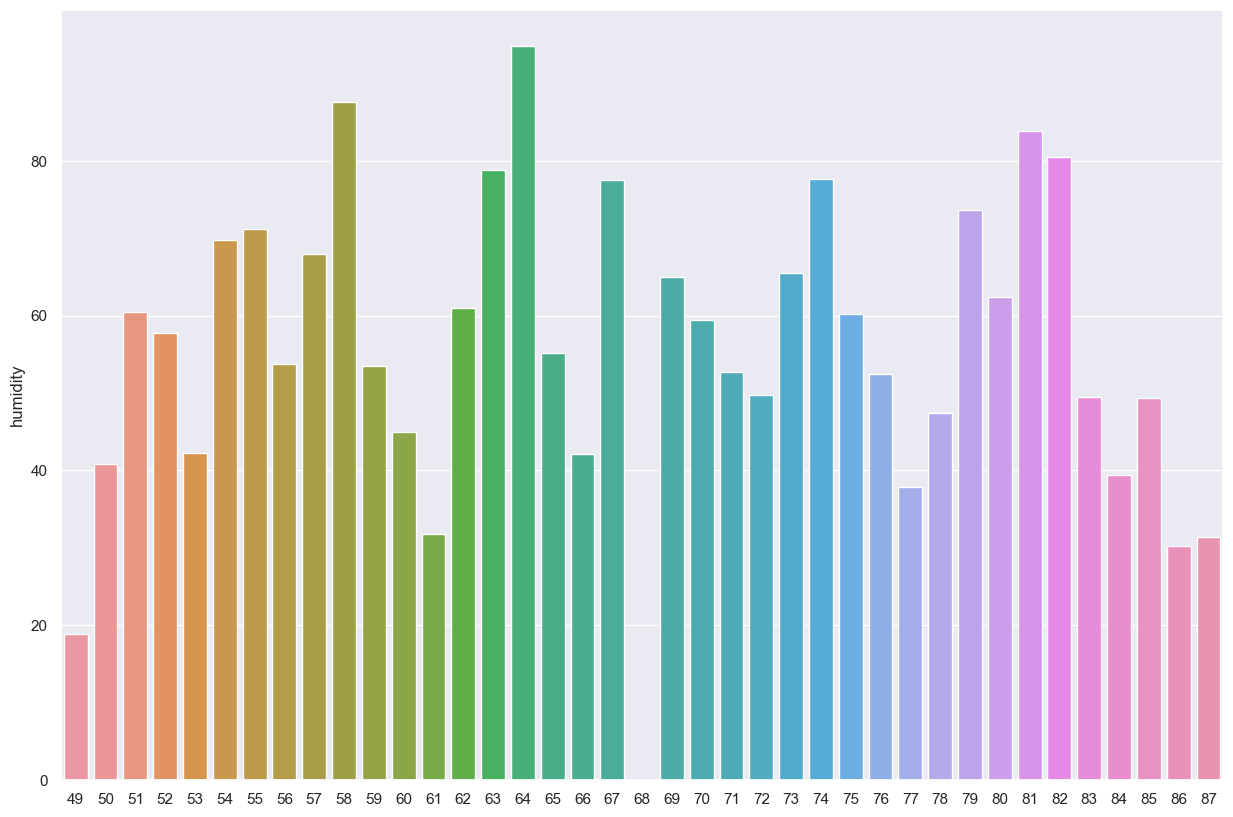

In [42]:
Humidity_plot = sns.barplot(y = Hum_check.humidity, x = Hum_check.index)
plt.show()

as we can see there exist NO particular pattern of gradual for the record Humidity to be 0.0 in dataset thus concluding this can be a mistake or a typo hence we have to replace this record and remove the anomaly from the dataset

In [43]:
Humidity_Mean = day.humidity.mean()

In [44]:
day['humidity'] = day['humidity'].apply(lambda x: Humidity_Mean if x == 0.0 else x)

# or we can also use...
# day.loc[day.index == 68, 'humidity'] = Humidity_Mean

In [45]:
day.loc[68]

date                 10
season           spring
year                  0
month                 3
holiday               0
weekday               6
workingday            0
weather               3
temp          15.952731
humidity      62.765175
windspeed     17.545759
casual               46
registered          577
Ridecount           623
Name: 68, dtype: object

**2.11 . windspeed**

In [46]:
day.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

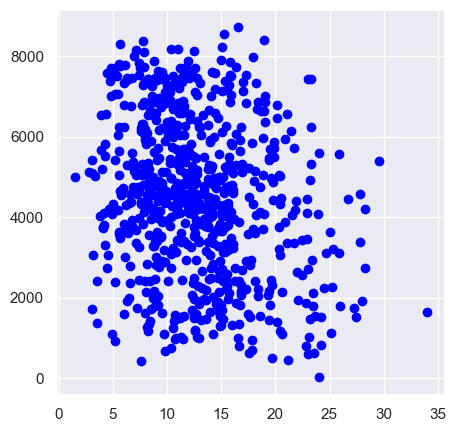

In [47]:
plt.figure(figsize=(5, 5))
x = day.windspeed
y = day.Ridecount 
plt.scatter(x, y, c ="blue")
# To show the plot
plt.show()

As we can see the windspeed attribute is totally normal and has no particular pattern in plots above Thus no need of any change in the column required lets proceed as it is.

**2.1 . casual and registered - ride columns**

These two variable columns are basically a components of the final target variable that we have set for our analysis so the sum of these 2 column records will return the final value in our column which we already have so assuming these columns wont contribute much in the analysis part lets deop them and move ahead.

In [48]:
day = day.drop(['casual','registered'], axis = 1)
day.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,Ridecount
0,1,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,2,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,3,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,4,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,5,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


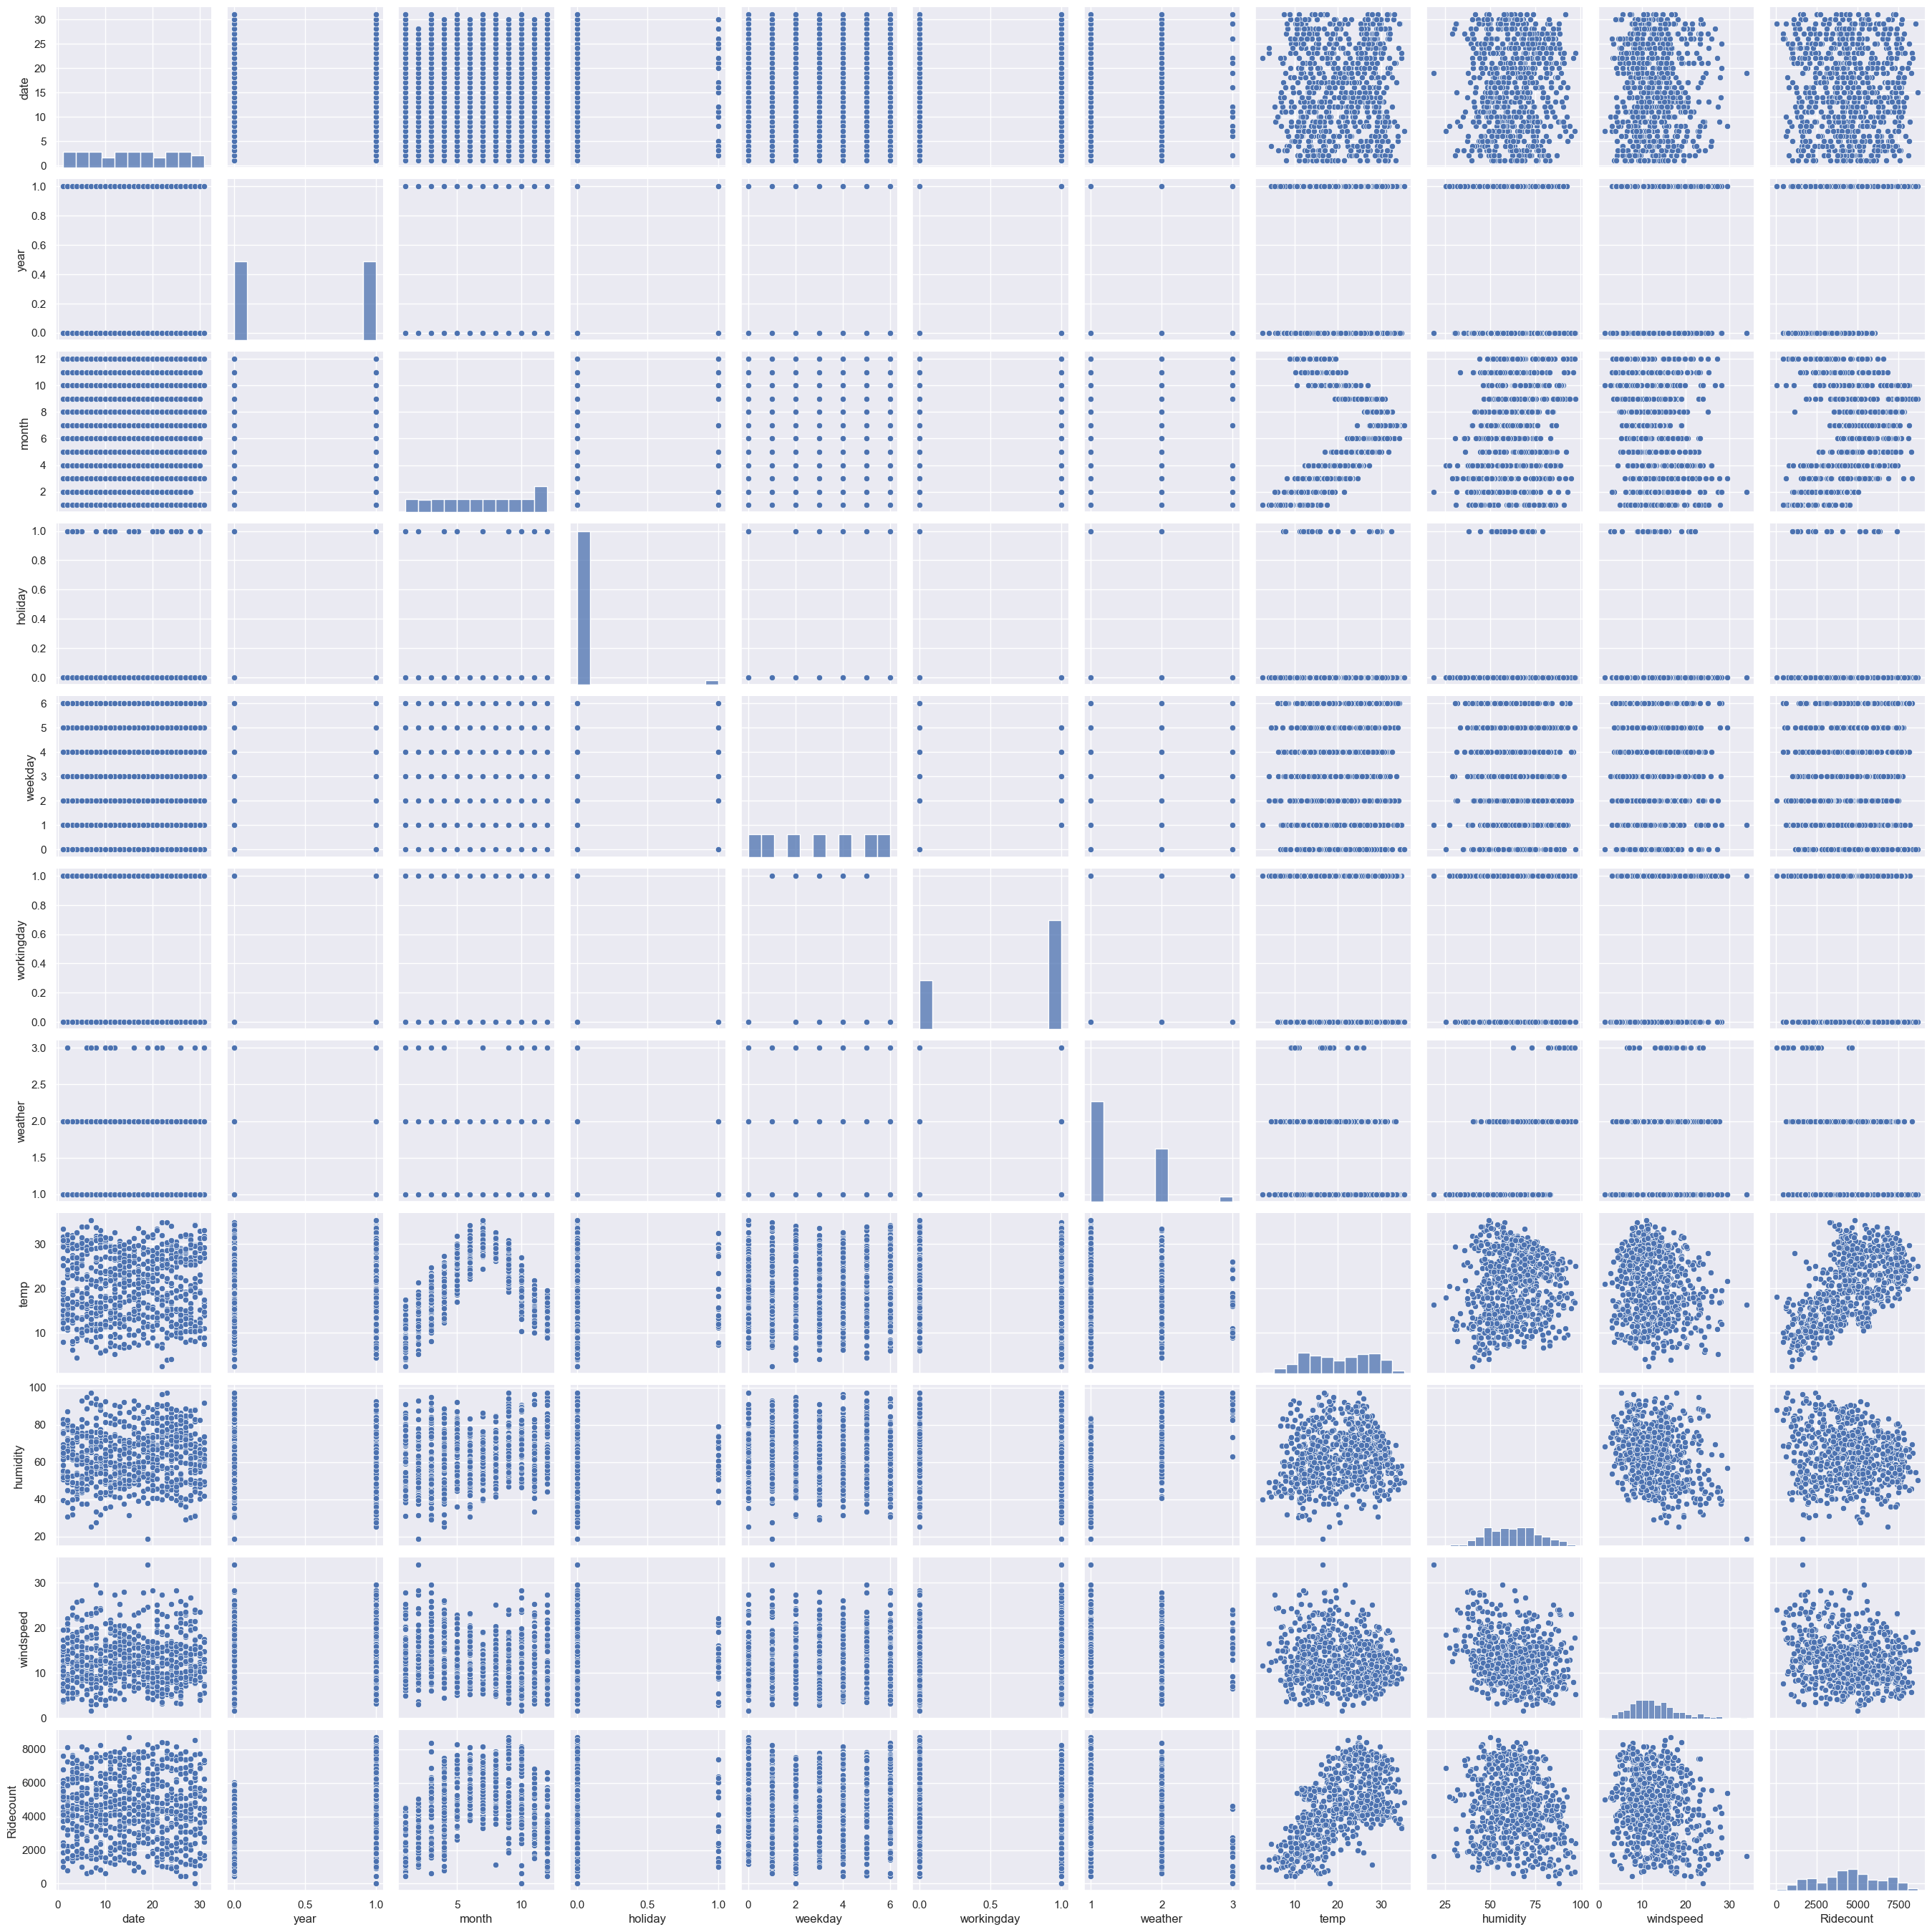

In [49]:
sns.pairplot(day)
plt.show()

Following are the few assumptions that can hold up from the pairplot with respect to Ridecount as Target Variable:

* Date Column seems to be scattered evenly across all the points. No particular pattern noticed.
* Ride Count Seems to be in maximum in Fall followed by Summer, Winter and Spring respectively.
* Ride Count increased drastically in 2019 as compared to 2018
* Ride Count seems to increase between May to October which are comparatively Fall(Autumn) & Summer Season in US
* Ride Count is lesser on Holidays(Bank Holidays and national events of US)  as compared to other days.
* Working Day / Non-Working Day shows almost similar behaviour.
* Ride Count is more on Clear Days as compared to Light Snow / Rainfall
* Ride Count seems to be very much linearly dependent on Temperature
* Humidity & windspeed does not indicate any specific behaviour on just visualising the data.

### 3 Encoding the categorical attributes in Dataset
Lets encode the following variables in data set that are categorical in nature which will make the model buiding task easier
- season
- month
- weekday
- weather

In [50]:
day.head(3)

,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,Ridecount
0,1,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,2,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,3,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349


In [51]:
cat_var = day[['season', 'month', 'weekday', 'weather']]
cat_var.head(3)

,season,month,weekday,weather
0,spring,1,1,2
1,spring,1,2,2
2,spring,1,3,1


In [52]:
cat_var.month.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: month, dtype: float64

In [53]:
cat_var.weather = cat_var.weather.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
cat_var.weekday = cat_var.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
cat_var.month = cat_var.month.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

In [54]:
cat_var.head()

,season,month,weekday,weather
0,spring,January,monday,mist
1,spring,January,tuesday,mist
2,spring,January,wednesday,clear
3,spring,January,thursday,clear
4,spring,January,friday,clear


In [55]:
dum = pd.get_dummies(cat_var, drop_first=True)
dum.columns.values

array(['season_spring', 'season_summer', 'season_winter', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weather_light',
       'weather_mist'], dtype=object)

In [56]:
day.columns.values

array(['date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Ridecount'], dtype=object)

In [57]:
day = pd.concat([day, dum], axis=1)
day.head(3)

,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,...,month_October,month_September,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
0,1,spring,0,1,0,1,1,2,14.110847,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,2,spring,0,1,0,2,1,2,14.902598,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,3,spring,0,1,0,3,1,1,8.050924,43.7273,...,0,0,0,0,0,0,0,1,0,0


In [58]:
day = day.drop(columns = cat_var)

In [59]:
day.head(3)

,date,year,holiday,workingday,temp,humidity,windspeed,Ridecount,season_spring,season_summer,...,month_October,month_September,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
0,1,0,0,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
day.columns.values

array(['date', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'Ridecount', 'season_spring', 'season_summer',
       'season_winter', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weather_light', 'weather_mist'], dtype=object)

### Creating Train - Test Split

In [61]:
df_train, df_test = train_test_split(day, train_size=0.7, random_state=100)

In [62]:
df_train.shape

(510, 30)

In [63]:
df_test.shape

(220, 30)

In [64]:
num_var =  ['date', 'temp', 'humidity', 'windspeed', 'Ridecount']

In [65]:
scaler = MinMaxScaler()

In [66]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,date,year,holiday,workingday,temp,humidity,windspeed,Ridecount,season_spring,season_summer,...,month_October,month_September,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
576,1.000000,1,0,1,0.815169,0.659744,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0.066667,1,0,0,0.442393,0.553780,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,0.966667,1,0,1,0.245101,0.377528,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0.900000,1,0,0,0.395666,0.385516,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0.700000,0,0,0,0.345824,0.692225,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


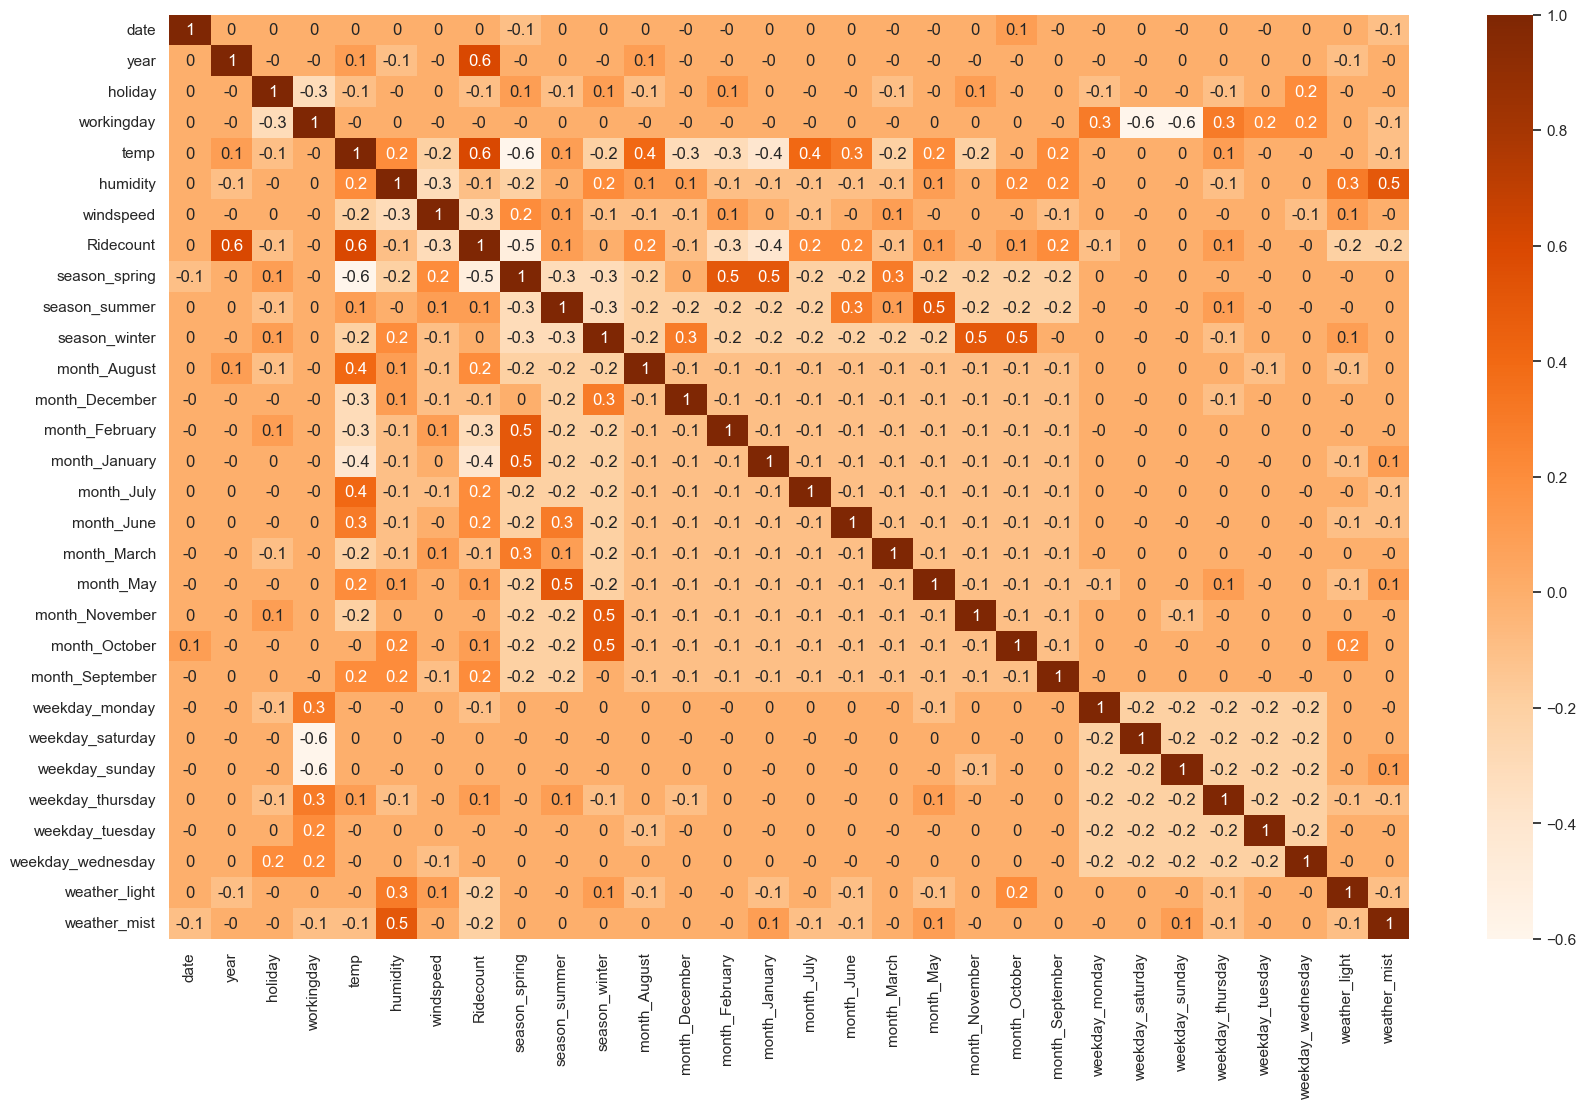

In [67]:
df_train.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Oranges')
plt.show()

Using the above Heatmap we can affectively infere that there is no direct correlation between any 2 variables, so lets move forward with checking multicollinearity of variables.

In [68]:
y_train = df_train.pop('Ridecount')
X_train = df_train

#  Iterative Modeling Process

As of now we have 29 features to predict and infere final result in model but this number of variables to build a successful model is a pretty big number to analyse 1-by-1 and can be a tedious, time consuming task to fulfill.

To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome).

We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

**Model 1**

In [69]:
#fitting the model and adding constant in data

# Add a new constant to model
X_train_Rm = sm.add_constant(X_train)

# Creating a fitted model
lr = sm.OLS(y_train, X_train_Rm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridecount   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     94.15
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          8.47e-178
Time:                        16:47:33   Log-Likelihood:                 523.48
No. Observations:                 510   AIC:                            -987.0
Df Residuals:                     480   BIC:                            -859.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3669      0.084      4.358      0.000       0.201       0.532
date                 -0.0048      0.014     -0.356      0.722      -0.031       0.022
year                  0.2305      0.008     28.237      0.000       0.214       0.247
holiday              -0.1356      0.065     -2.072      0.039      -0.264      -0.007
workingday           -0.0612      0.071     -0.861      0.390      -0.201       0.079
temp                  0.4453      0.047      9.456      0.000       0.353       0.538
humidity             -0.1378      0.034     -4.108      0.000      -0.204      -0.072
windspeed            -0.1849      0.026     -7.053      0.000      -0.236      -0.133
season_spring        -0.0383      0.030     -1.262      0.208      -0.098       0.021
season_summer         0.0466      0.026      1.766      0.078      -0.005       0.098
season_winter         0.1137      0.028      4.020      0.000       0.058       0.169
month_August          0.0272      0.034      0.801      0.424      -0.039       0.094
month_December       -0.0441      0.034     -1.300      0.194      -0.111       0.023
month_February       -0.0387      0.033     -1.163      0.245      -0.104       0.027
month_January        -0.0645      0.034     -1.903      0.058      -0.131       0.002
month_July           -0.0296      0.035     -0.838      0.402      -0.099       0.040
month_June            0.0078      0.025      0.310      0.757      -0.041       0.057
month_March           0.0021      0.025      0.085      0.933      -0.047       0.051
month_May             0.0253      0.021      1.192      0.234      -0.016       0.067
month_November       -0.0395      0.037     -1.074      0.284      -0.112       0.033
month_October         0.0055      0.036      0.150      0.881      -0.066       0.077
month_September       0.0906      0.032      2.816      0.005       0.027       0.154
weekday_monday       -0.0244      0.015     -1.673      0.095      -0.053       0.004
weekday_saturday     -0.0552      0.072     -0.770      0.442      -0.196       0.086
weekday_sunday       -0.0504      0.072     -0.704      0.482      -0.191       0.090
weekday_thursday      0.0048      0.015      0.319      0.750      -0.025       0.034
weekday_tuesday      -0.0253      0.015     -1.723      0.086      -0.054       0.004
weekday_wednesday    -0.0097      0.015     -0.636      0.525      -0.040       0.020
weather_light        -0.2386      0.028     -8.588      0.000      -0.293      -0.184
weather_mist         -0.0559      0.011     -5.165      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       77.526   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.892
Skew:   

In [70]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,60.89
4,temp,43.70
5,humidity,25.07
7,season_spring,13.54
9,season_winter,12.47
23,weekday_sunday,11.84
22,weekday_saturday,11.40
8,season_summer,9.77
18,month_November,7.15
19,month_October,6.84


**Model - 2**

In [71]:
X_train= X_train.drop(['date','workingday','season_spring','month_August','month_December','month_February', 'month_June','month_March', 'month_October', 'weekday_saturday', 'weekday_sunday','weekday_thursday','weekday_wednesday'], axis = 1)

In [72]:
X_train

,year,holiday,temp,humidity,windspeed,season_summer,season_winter,month_January,month_July,month_May,month_November,month_September,weekday_monday,weekday_tuesday,weather_light,weather_mist
576,1,0,0.815169,0.659744,0.264686,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.553780,0.255342,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.377528,0.663106,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0.395666,0.385516,0.188475,1,0,0,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.692225,0.380981,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.602768,0.187140,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.300481,0.111379,0,0,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.476570,0.431816,0,1,0,0,0,0,0,1,0,0,1
79,0,0,0.462664,0.702203,0.529881,1,0,0,0,0,0,0,0,0,0,1


In [73]:
# Add a new constant to model
X_train_Rm = sm.add_constant(X_train)

# Creating a fitted model
lr = sm.OLS(y_train, X_train_Rm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridecount   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.34e-187
Time:                        16:47:36   Log-Likelihood:                 513.99
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     493   BIC:                            -922.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2255      0.024      9.307      0.000       0.178       0.273
year                0.2285      0.008     28.171      0.000       0.213       0.244
holiday            -0.0969      0.026     -3.772      0.000      -0.147      -0.046
temp                0.5672      0.026     22.209      0.000       0.517       0.617
humidity           -0.1549      0.033     -4.749      0.000      -0.219      -0.091
windspeed          -0.1905      0.026     -7.380      0.000      -0.241      -0.140
season_summer       0.0717      0.012      5.791      0.000       0.047       0.096
season_winter       0.1323      0.013     10.357      0.000       0.107       0.157
month_January      -0.0398      0.017     -2.276      0.023      -0.074      -0.005
month_July         -0.0432      0.018     -2.399      0.017      -0.079      -0.008
month_May           0.0113      0.017      0.646      0.518      -0.023       0.045
month_November     -0.0179      0.017     -1.043      0.297      -0.051       0.016
month_September     0.0936      0.016      5.838      0.000       0.062       0.125
weekday_monday     -0.0251      0.011     -2.228      0.026      -0.047      -0.003
weekday_tuesday    -0.0274      0.011     -2.412      0.016      -0.050      -0.005
weather_light      -0.2262      0.027     -8.246      0.000      -0.280      -0.172
weather_mist       -0.0497      0.011     -4.664      0.000      -0.071      -0.029
==============================================================================
Omnibus:                       56.928   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.959
Skew:                          -0.631   Prob(JB):                     8.94e-27
Kurtosis:                       5.013   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,15.20
2,temp,11.22
4,windspeed,3.56
6,season_winter,2.45
15,weather_mist,2.35
5,season_summer,2.33
0,year,2.05
9,month_May,1.59
10,month_November,1.59
8,month_July,1.57


**Model - 3**

In [75]:
X_train= X_train.drop(['humidity','month_May'], axis = 1)

In [76]:
#fitting the model and adding constant in data

# Add a new constant to model
X_train_Rm = sm.add_constant(X_train)

# Creating a fitted model
lr = sm.OLS(y_train, X_train_Rm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridecount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.26e-185
Time:                        16:47:39   Log-Likelihood:                 502.58
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     495   BIC:                            -911.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1564      0.020      7.925      0.000       0.118       0.195
year                0.2332      0.008     28.421      0.000       0.217       0.249
holiday            -0.0985      0.026     -3.757      0.000      -0.150      -0.047
temp                0.5365      0.025     21.437      0.000       0.487       0.586
windspeed          -0.1557      0.025     -6.180      0.000      -0.205      -0.106
season_summer       0.0741      0.011      6.621      0.000       0.052       0.096
season_winter       0.1210      0.013      9.449      0.000       0.096       0.146
month_January      -0.0448      0.018     -2.523      0.012      -0.080      -0.010
month_July         -0.0348      0.018     -1.906      0.057      -0.071       0.001
month_November     -0.0137      0.017     -0.787      0.432      -0.048       0.021
month_September     0.0895      0.016      5.483      0.000       0.057       0.122
weekday_monday     -0.0255      0.011     -2.223      0.027      -0.048      -0.003
weekday_tuesday    -0.0320      0.012     -2.773      0.006      -0.055      -0.009
weather_light      -0.2876      0.025    -11.649      0.000      -0.336      -0.239
weather_mist       -0.0797      0.009     -9.115      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       53.745   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.423
Skew:                          -0.616   Prob(JB):                     4.71e-24
Kurtosis:                       4.881   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.21
3,windspeed,3.45
5,season_winter,2.08
0,year,2.04
4,season_summer,1.83
8,month_November,1.59
13,weather_mist,1.54
7,month_July,1.53
9,month_September,1.30
6,month_January,1.23


**Model - 4**

In [78]:
X_train= X_train.drop(['month_November'], axis = 1)

In [79]:
#fitting the model and adding constant in data

# Add a new constant to model
X_train_Rm = sm.add_constant(X_train)

# Creating a fitted model
lr = sm.OLS(y_train, X_train_Rm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridecount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.05e-186
Time:                        16:47:42   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1556      0.020      7.899      0.000       0.117       0.194
year                0.2332      0.008     28.430      0.000       0.217       0.249
holiday            -0.1009      0.026     -3.876      0.000      -0.152      -0.050
temp                0.5380      0.025     21.560      0.000       0.489       0.587
windspeed          -0.1566      0.025     -6.222      0.000      -0.206      -0.107
season_summer       0.0742      0.011      6.636      0.000       0.052       0.096
season_winter       0.1165      0.011     10.194      0.000       0.094       0.139
month_January      -0.0441      0.018     -2.486      0.013      -0.079      -0.009
month_July         -0.0351      0.018     -1.925      0.055      -0.071       0.001
month_September     0.0905      0.016      5.558      0.000       0.058       0.122
weekday_monday     -0.0255      0.011     -2.217      0.027      -0.048      -0.003
weekday_tuesday    -0.0319      0.012     -2.766      0.006      -0.055      -0.009
weather_light      -0.2867      0.025    -11.630      0.000      -0.335      -0.238
weather_mist       -0.0795      0.009     -9.098      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       52.796   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.373
Skew:                          -0.610   Prob(JB):                     2.17e-23
Kurtosis:                       4.850   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.19
3,windspeed,3.42
0,year,2.04
4,season_summer,1.83
12,weather_mist,1.54
5,season_winter,1.53
7,month_July,1.53
8,month_September,1.29
6,month_January,1.23
10,weekday_tuesday,1.23


### Residual Analysis

In [81]:
y_train_pred = lr_model.predict(X_train_Rm)
y_train_pred

576    0.750790
426    0.507364
728    0.391415
482    0.566908
111    0.276764
         ...   
578    0.824319
53     0.247205
350    0.233120
79     0.316307
520    0.650161
Length: 510, dtype: float64

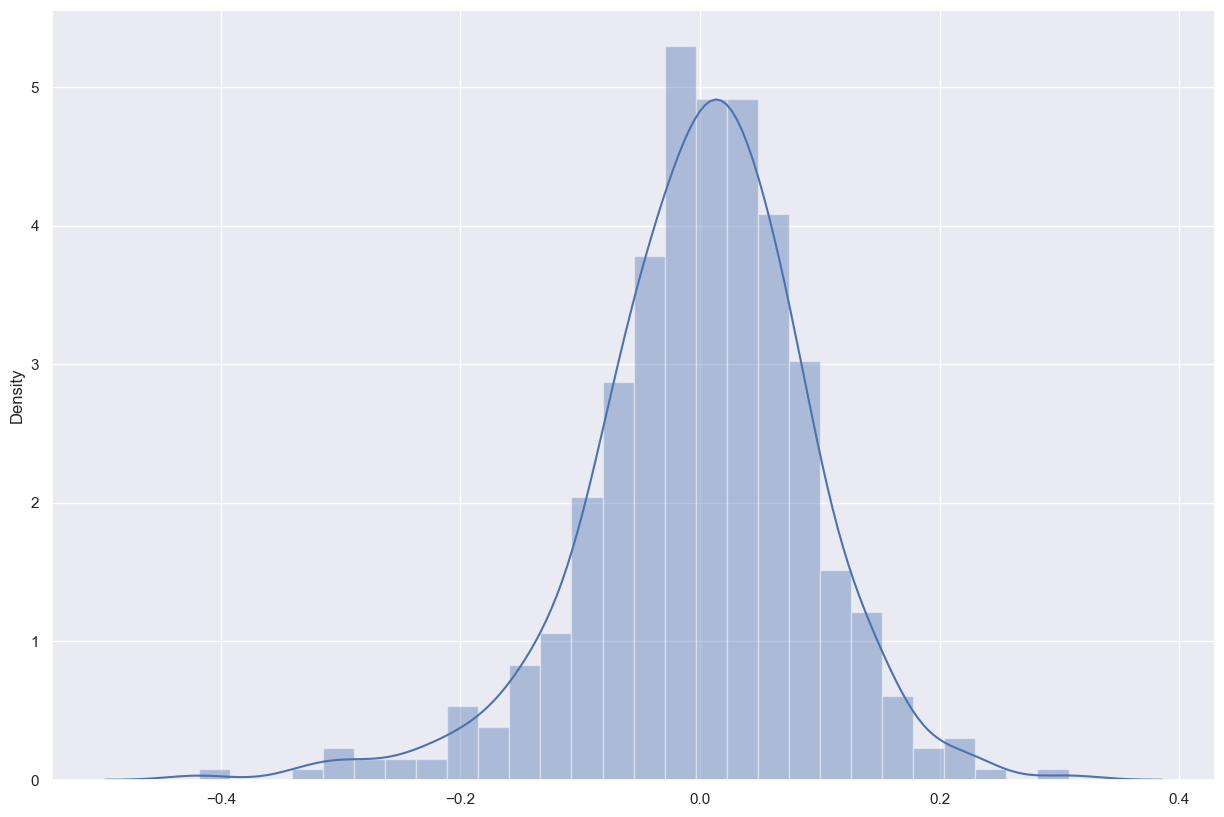

In [82]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

As we can see that the above error terms are normally distributed in the variables in the model this proves that the model built is not any random built model and is having meaningfull features that drive the model.

### Model Evaluation & Prediction

In [83]:
df_test.head()

,date,year,holiday,workingday,temp,humidity,windspeed,Ridecount,season_spring,season_summer,...,month_October,month_September,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
184,4,0,1,0,29.793347,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,20,1,0,1,32.082500,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,27,0,0,0,19.270000,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,10,0,0,1,31.433347,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,2,0,0,0,29.315000,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [84]:
df_test.shape

(220, 30)

In [85]:
num_var_test =  ['date', 'temp', 'humidity', 'windspeed', 'Ridecount']
df_test.head(2)

,date,year,holiday,workingday,temp,humidity,windspeed,Ridecount,season_spring,season_summer,...,month_October,month_September,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
184,4,0,1,0,29.793347,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,20,1,0,1,32.082500,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0


In [86]:
df_test[num_var_test] = scaler.fit_transform(df_test[num_var_test])
df_test.head()

,date,year,holiday,workingday,temp,humidity,windspeed,Ridecount,season_spring,season_summer,...,month_October,month_September,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
184,0.100000,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0.633333,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0.866667,0,0,0,0.496221,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0.300000,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0.033333,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [87]:
y_test = df_test.pop("Ridecount")
X_test = df_test

In [88]:
X_test = X_test[X_train.columns]
X_test = sm.add_constant(X_test)

In [89]:
y_pred = lr_model.predict(X_test)

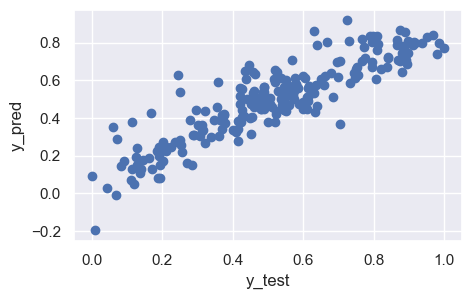

In [90]:
fig = plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [91]:
print(lr_model.summary())
print()
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:              Ridecount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.05e-186
Time:                        16:49:47   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1556      0.020     

In [ ]:
print(sort(lr_model.params))

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7878143300693278

 ## <font color = Red> Case-Study Questions : </font>


### Assignment-based Subjective Questions
#### Q 1.  From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? (3 marks)

The above analaysis for categorical variables is done using mainly barplots and Boxplots when necessary to map outliers and missing values using Pandas, Numpy, Seaborn and MatplotLib Libraries in Python.
Following are the categorical variables in Dataset above : date, season, year, month, holiday, weekday, workingday, and weather.
- date variable doesn't make any difference to decision making or prediction process as the Ride count remains randomly distributed, whereas "season" attribute clearly shows a pattern of steady rise in 4 seasons from spring-to-fall gradually for spring being least and fall season having most ride count.
- In the Year attribute we can see drastic increase in year 2019 from 2018, also the trend of increase is seen in months May to October respectively as shown in the bar graph.
- Monday Tuesday, Wednesday in weekdays have relatively low number of Rides which is reasonable as the end of the week people prefer spending time with family and friends for outings so might have more bookings on Thurs, Fri Sat, Sundays, workingday/ Non-working day are almost equal in ride counts.
- Ride count graph indicates High count on clear weather parameter as compared to others which is as expected.



#### Q 2. Why is it important to use drop_first = True during dummy variable creation? (2 mark)

drop_first is an important parameter in one hot encoder in python taking True or false values as input for encoding the dummy variables.<br>
If we do not use drop_first = True, then n dummy variables will be created, and these predictors(n dummy variables) are themselves correlated which is known as multicollinearity and it, in turn, leads to Dummy Variable Trap.<br>
By dropping one of the one-hot encoded columns from each categorical feature, we ensure there are no "reference" columns—the remaining columns become linearly independent.<br>
Thus the number of dummy values created will always be **n-1** if there are  **n** number of values to be encoded.

#### Q 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? (1 mark)

By observing at the pairplots we can clearly understand there exists highest correlation with "Temp" variable with the Target attribute.

#### Q 4. How did you validate the assumptions of Linear Regression after building the model on the training set? (3 marks)

The following are some assumptions about dataset that is made by Linear Regression model −<br>
**Multi-collinearity** - Linear regression model assumes that there is very little or no multi-collinearity in the data. Basically, multi-collinearity occurs when the independent variables or features have dependency in them.<br>
**Auto-correlation** - Another assumption Linear regression model assumes is that there is very little or no auto-correlation in the data. Basically, auto-correlation occurs when there is dependency between residual errors.<br>
**Relationship between variables** - Linear regression model assumes that the relationship between response and feature variables must be linear.<br>
**Normality of error terms** - Error Terms are normally distributed throughout the model built also the error terms are independent of each other.<br>
**Homoscedasticity** - This refers to a nature of error values where in residual values do not show any pattern in graphs i.e  homoscedasticity means contant variance in residual terms


#### Q 5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes? (2 marks)

Following are the top 3 features contributing highly in the built model : -
- temp
- winter season
- year
